https://www.kaggle.com/datasets/mosapabdelghany/medical-insurance-cost-dataset?resource=download

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import sys

print(f"Python executable: {sys.executable}")
print(f"Python version: {sys.version}")

!{sys.executable} -m pip install --break-system-packages kagglehub

Python executable: /Users/victoriasamsonova/bsu/oiad/oiad-11-2025/.venv/bin/python
Python version: 3.10.16 (main, Dec  3 2024, 17:27:57) [Clang 16.0.0 (clang-1600.0.26.4)]


In [3]:
import kagglehub
path = kagglehub.dataset_download("mosapabdelghany/medical-insurance-cost-dataset")

print("Path to dataset files:", path)

/Users/victoriasamsonova/bsu/oiad/oiad-11-2025/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/victoriasamsonova/.cache/kagglehub/datasets/mosapabdelghany/medical-insurance-cost-dataset/versions/1


In [4]:
df = pd.read_csv("/Users/victoriasamsonova/.cache/kagglehub/datasets/mosapabdelghany/medical-insurance-cost-dataset/versions/1/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500



## 1. Подготовка данных
1. проверить наличие пропусков и выбросов
2. привести категориальные признаки к числовым
3. вычислить парные корреляции признаков

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

ПРОВЕРКА ПРОПУСКОВ
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Общее количество пропусков: 0

ПРОВЕРКА ВЫБРОСОВ
Числовые столбцы для анализа выбросов: ['age', 'bmi', 'children', 'charges']

Описательная статистика:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


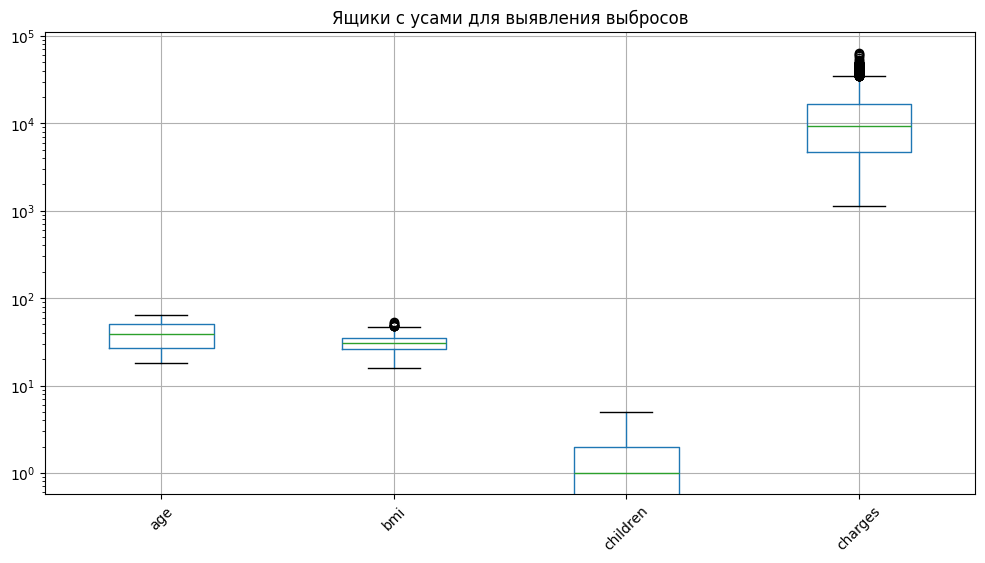

Выбросы в столбце age: 0 (0.00%)
Выбросы в столбце bmi: 9 (0.67%)
Выбросы в столбце children: 0 (0.00%)
Выбросы в столбце charges: 139 (10.39%)


In [18]:
print(df.columns.tolist())
print("\nПРОВЕРКА ПРОПУСКОВ")
print(df.isna().sum())
print(f"\nОбщее количество пропусков: {df.isna().sum().sum()}")

print("\nПРОВЕРКА ВЫБРОСОВ")
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

if numeric_columns:
    print("Числовые столбцы для анализа выбросов:", numeric_columns)
    
    print("\nОписательная статистика:")
    print(df[numeric_columns].describe())
    
    plt.figure(figsize=(12, 6))
    df[numeric_columns].boxplot()
    plt.title('Ящики с усами для выявления выбросов')
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.show()
    
    for col in numeric_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"Выбросы в столбце {col}: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
else:
    print("Числовые столбцы не найдены для анализа выбросов")


In [ ]:
print("\nПРЕОБРАЗОВАНИЕ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ")
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

if categorical_columns:
    print("Категориальные столбцы:", categorical_columns)
    
    df_encoded = df.copy()
    
    for col in categorical_columns:
        print(f"\nобработка столбца '{col}' ")
        print(f"уникальные значения: {df[col].nunique()}")
        print(f"Примеры значений: {df[col].unique()[:5]}")  
        
        # Заполняем пропуски
        if df_encoded[col].isna().any():
            df_encoded[col] = df_encoded[col].fillna('Unknown')
            print(f"заполнено пропусков: {df[col].isna().sum()}")
        
        # Создаем словарь для кодирования
        unique_values = df_encoded[col].unique()
        encoding_dict = {value: idx for idx, value in enumerate(unique_values)}
        
        # Применяем кодирование
        df_encoded[col] = df_encoded[col].map(encoding_dict)
        
        print(f"Закодировано. Пример преобразования:")
        print(f"  {encoding_dict}")
        
    print("\nПервые 5 строк после кодирования:")
    print(df_encoded.head())
    
    # Сохраняем словари кодирования для обратного преобразования
    encoding_dicts = {}
    for col in categorical_columns:
        unique_values = df[col].dropna().unique()
        encoding_dicts[col] = {value: idx for idx, value in enumerate(unique_values)}
    
else:
    print("Категориальные столбцы не найдены")
    df_encoded = df.copy()


#ordinal
#уан хот


ПРЕОБРАЗОВАНИЕ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ
Категориальные столбцы: ['sex', 'smoker', 'region']

обработка столбца 'sex' 
уникальные значения: 2
Примеры значений: ['female' 'male']
Закодировано. Пример преобразования:
  {'female': 0, 'male': 1}

обработка столбца 'smoker' 
уникальные значения: 2
Примеры значений: ['yes' 'no']
Закодировано. Пример преобразования:
  {'yes': 0, 'no': 1}

обработка столбца 'region' 
уникальные значения: 4
Примеры значений: ['southwest' 'southeast' 'northwest' 'northeast']
Закодировано. Пример преобразования:
  {'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3}

Первые 5 строк после кодирования:
   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       0       0  16884.92400
1   18    1  33.770         1       1       1   1725.55230
2   28    1  33.000         3       1       1   4449.46200
3   33    1  22.705         0       1       2  21984.47061
4   32    1  28.880         0       1       2   3866.85520


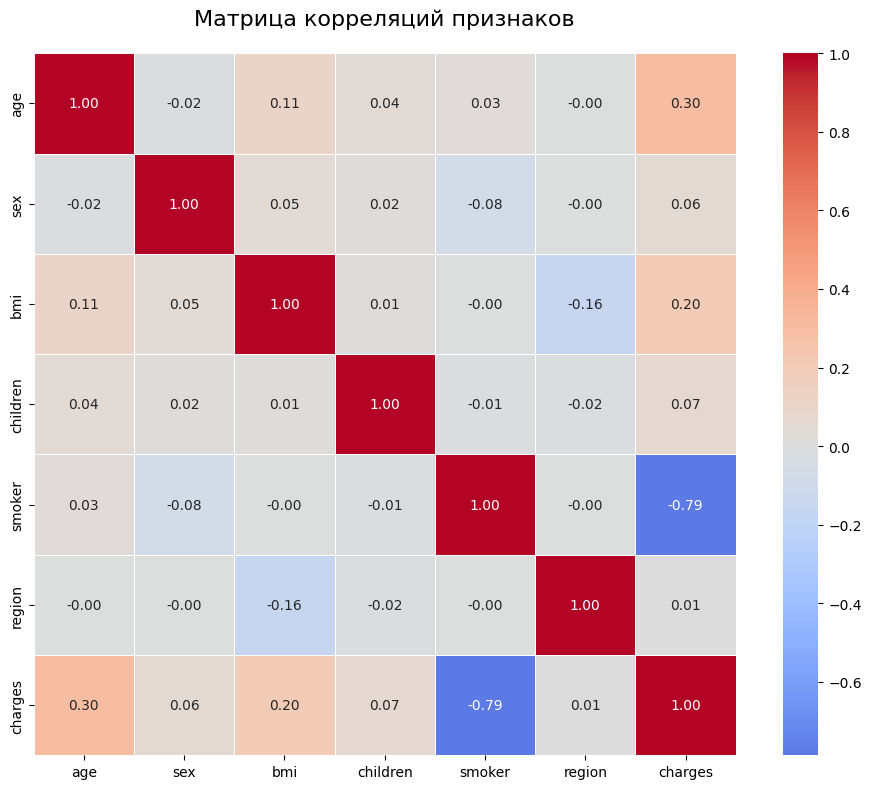

In [20]:
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True,           
            cmap='coolwarm',      
            center=0,             
            square=True,          
            fmt='.2f',            
            linewidths=0.5)       

plt.title('Матрица корреляций признаков', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

## 2. Многомерная линейная регрессия
Построить модель линейной регрессии и подобрать параметры:
1. аналитически (реализовать самому)
2. численно, с помощью методов градиентного спуска (реализовать самому)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [22]:
TARGET = 'charges'

X_all = df_encoded.drop(columns=[TARGET]).to_numpy(dtype=float)
y_all = df_encoded[TARGET].to_numpy(dtype=float)

X_train, X_test, y_train, y_test = train_test_split(
    X_all, y_all, test_size=0.2, random_state=42
)

def add_bias(X):
    return np.hstack([np.ones((X.shape[0], 1)), X])

X_train_b = add_bias(X_train)
X_test_b = add_bias(X_test)

#w = (X^T X)^(-1) X^T y
w_normal = np.linalg.pinv(X_train_b.T @ X_train_b) @ (X_train_b.T @ y_train)

y_pred_train_ne = X_train_b @ w_normal
y_pred_test_ne = X_test_b @ w_normal

mse_train_ne = mean_squared_error(y_train, y_pred_train_ne)
mse_test_ne = mean_squared_error(y_test, y_pred_test_ne)
print(f"MSE (аналитич.) train={mse_train_ne:.2f} test={mse_test_ne:.2f}")


MSE (аналитич.) train=37280663.22 test=33635210.43


In [11]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# градиентный спуск
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

X_train_std_b = add_bias(X_train_std)
X_test_std_b = add_bias(X_test_std)

def gradient_descent(X, y, lr=0.01, n_iters=20000):
    n_samples, n_features = X.shape
    w = np.zeros(n_features, dtype=float)
    for i in range(n_iters):
        y_pred = X @ w
        grad = (2.0 / n_samples) * (X.T @ (y_pred - y))
        w -= lr * grad
    return w

w_gd = gradient_descent(X_train_std_b, y_train, lr=0.01, n_iters=20000)
y_pred_train_gd = X_train_std_b @ w_gd
y_pred_test_gd = X_test_std_b @ w_gd

mse_train_gd = mean_squared_error(y_train, y_pred_train_gd)
mse_test_gd = mean_squared_error(y_test, y_pred_test_gd)
print(f"MSE (градиентный спуск) train={mse_train_gd:.2f} test={mse_test_gd:.2f}")


MSE (градиентный спуск) train=37280663.22 test=33635210.43


## 3. Добавление регуляризации
Модифицировать линейную модель путем добавления регуляризационного слагаемого. Найти оптимальные веса:
1. аналитически
2. численно

In [ ]:
def ridge_closed_form(X_b, y, alpha):
    n_features = X_b.shape[1]
    I = np.eye(n_features)
    I[0, 0] = 0.0  
    return np.linalg.pinv(X_b.T @ X_b + alpha * I) @ (X_b.T @ y)

from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(X_train_b, y_train, test_size=0.25, random_state=42)

alphas = np.logspace(-3, 3, 13)
best_alpha_cf = None
best_val_mse_cf = np.inf
best_w_cf = None

for a in alphas:
    w_cf = ridge_closed_form(X_tr, y_tr, a)
    val_pred = X_val @ w_cf
    val_mse = mean_squared_error(y_val, val_pred)
    if val_mse < best_val_mse_cf:
        best_val_mse_cf = val_mse
        best_alpha_cf = a
        best_w_cf = w_cf

print(f"Лучший alpha (closed-form) = {best_alpha_cf}, val MSE = {best_val_mse_cf:.2f}")

y_pred_test_ridge_cf = X_test_b @ best_w_cf
mse_test_ridge_cf = mean_squared_error(y_test, y_pred_test_ridge_cf)
print(f"MSE (ridge, аналитич.) test={mse_test_ridge_cf:.2f}")


def ridge_gd(X, y, alpha, lr=0.001, n_iters=50000, tol=1e-6):
    n_samples, n_features = X.shape
    w = np.zeros(n_features, dtype=float)
    prev_loss = np.inf
    for i in range(n_iters):
        y_pred = X @ w
        reg = alpha * np.r_[0.0, w[1:]]
        grad = (2.0 / n_samples) * (X.T @ (y_pred - y)) + 2.0 * reg
        w -= lr * grad
        if i % 100 == 0:
            loss = np.mean((y_pred - y) ** 2) + alpha * np.sum(w[1:] ** 2)
            if prev_loss - loss < tol:
                break
            prev_loss = loss
    return w


X_tr_s, X_val_s, y_tr_s, y_val_s = train_test_split(X_train_std_b, y_train, test_size=0.25, random_state=42)

best_alpha_gd = None
best_val_mse_gd = np.inf
best_w_gd_ridge = None

for a in alphas:
    w_try = ridge_gd(X_tr_s, y_tr_s, alpha=a, lr=0.001, n_iters=50000, tol=1e-6)
    val_pred = X_val_s @ w_try
    val_mse = mean_squared_error(y_val_s, val_pred)
    if val_mse < best_val_mse_gd:
        best_val_mse_gd = val_mse
        best_alpha_gd = a
        best_w_gd_ridge = w_try

print(f"Лучший alpha (ridge-GD) = {best_alpha_gd}, val MSE = {best_val_mse_gd:.2f}")

y_pred_test_ridge_gd = X_test_std_b @ best_w_gd_ridge
mse_test_ridge_gd = mean_squared_error(y_test, y_pred_test_ridge_gd)
print(f"MSE (ridge, градиентный спуск) test={mse_test_ridge_gd:.2f}")


Лучший alpha (closed-form) = 0.001, val MSE = 45761418.03
MSE (ridge, аналитич.) test=33743140.88
Лучший alpha (ridge-GD) = 0.001, val MSE = 45774500.79
MSE (ridge, градиентный спуск) test=33753406.40


## 4. Оценка обобщающей способности
Сравнить между собой модели на тестовых данных по среднему квадрату ошибки:
1. константную - прогноз средним значением
2. из пункта 2
3. из пункта 3

               model      mse_test
1   linear_normal_eq  3.363521e+07
2      linear_gd_std  3.363521e+07
3  ridge_closed_form  3.374314e+07
4       ridge_gd_std  3.375341e+07
0      baseline_mean  1.553914e+08


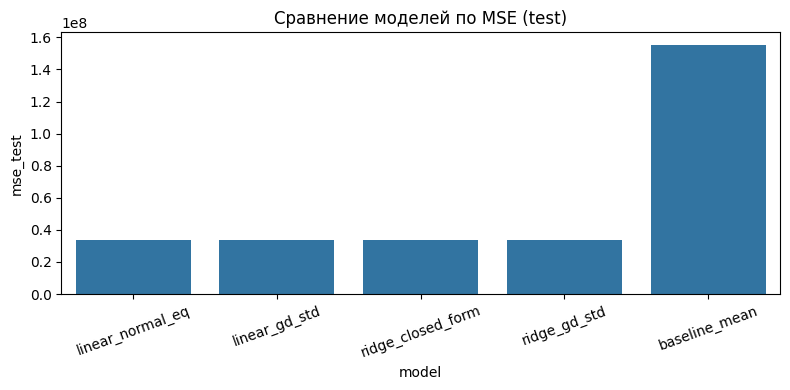

In [ ]:
results = []

# 1) прогноз средним по train
y_mean = np.full_like(y_test, fill_value=y_train.mean())
mse_baseline = mean_squared_error(y_test, y_mean)
results.append(("baseline_mean", mse_baseline))

# 2) из пункта 2
results.append(("linear_normal_eq", mse_test_ne))
results.append(("linear_gd_std", mse_test_gd))

# 3) Регуляризованная модель 
results.append(("ridge_closed_form", mse_test_ridge_cf))
results.append(("ridge_gd_std", mse_test_ridge_gd))


res_df = pd.DataFrame(results, columns=["model", "mse_test"]).sort_values("mse_test")
print(res_df)

plt.figure(figsize=(8,4))
sns.barplot(data=res_df, x="model", y="mse_test")
plt.title("Сравнение моделей по MSE (test)")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()
